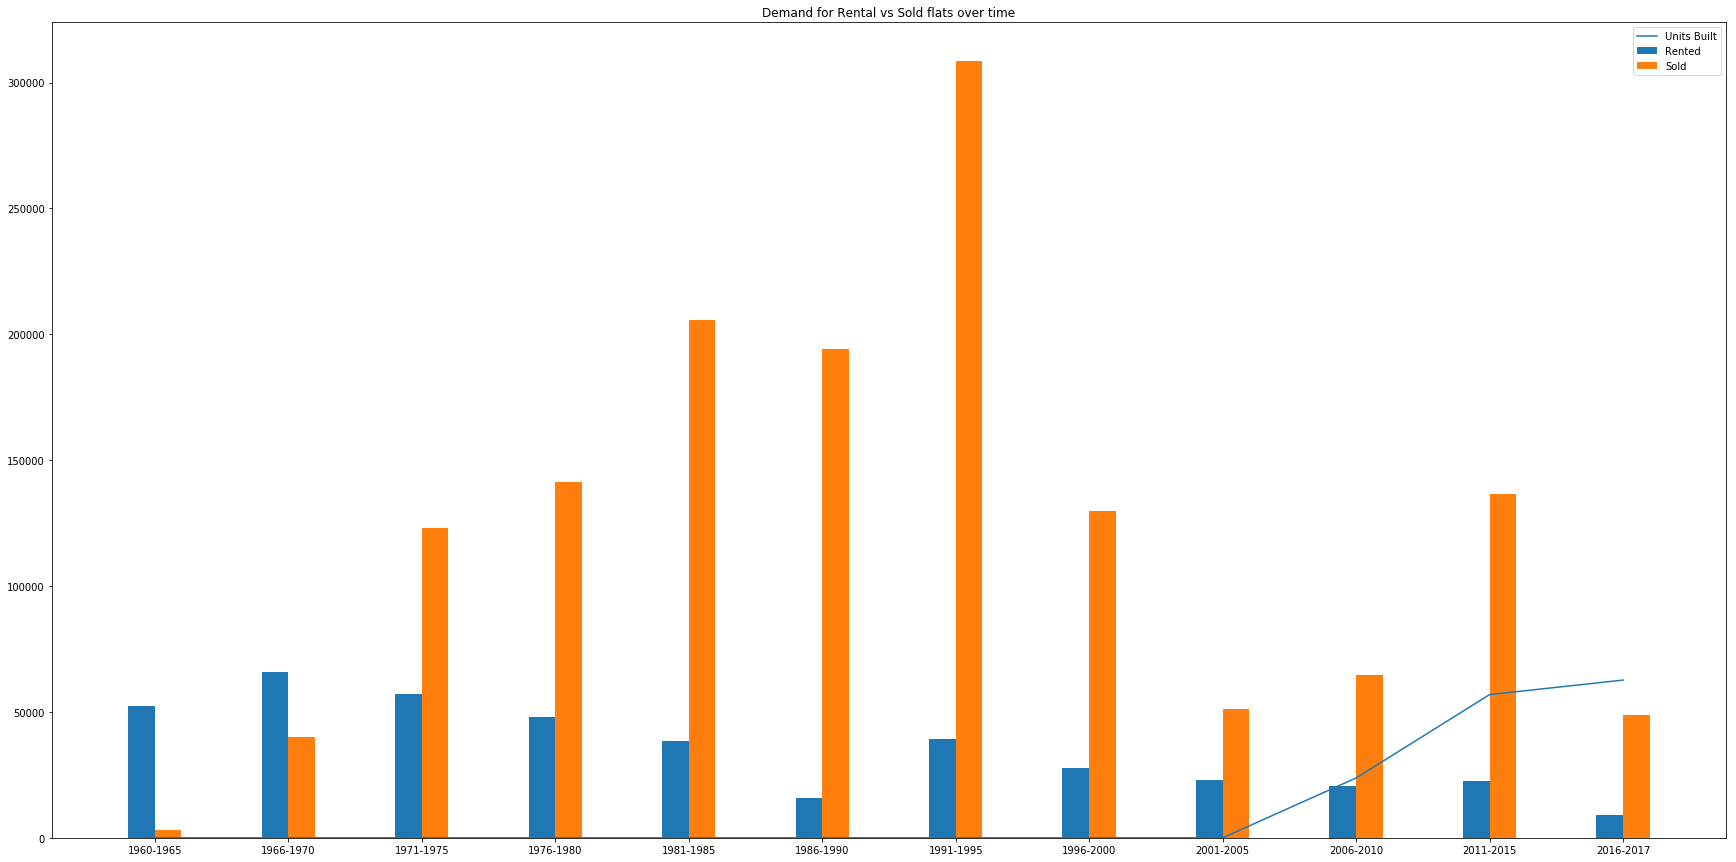

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# data source: https://data.gov.sg/dataset/key-stats-since-1960-demand-for-rental-and-sold-flats
d = np.genfromtxt('data/demand-for-rental-and-sold-flats.csv',
                 delimiter=',',
                 skip_header=1,
                 dtype=[('start_year','i4'),('end_year','i4'),('flat_type', 'U20'),('demand_for_flats','i4')])

d2_cumulative_dwellings_built = np.genfromtxt('data/cumulative-dwelling-units-completed-since-1960.csv',
                             delimiter=',',
                             skip_header=1,
                             dtype=[('financial_year','i4'),('dwelling_type','U10'),('no_of_units','i4')])

rented_flats_data = d[ d['flat_type'] == 'rental_flats' ]
rented_flats = np.array([( str(item['start_year']) + '-' + str(item['end_year']), int(item['demand_for_flats'])) 
                         for item in rented_flats_data], 
                            dtype=[('period','U20'),('demand','i4')])

sold_flats_data = d[ d['flat_type'] == 'home_ownership_flats' ] 
sold_flats = np.array([( str(item['start_year']) + '-' + str(item['end_year']), int(item['demand_for_flats'])) 
                       for item in sold_flats_data],
                         dtype=[('period','U20'),('demand','i4')])

cumulative_units_built_dict = {}
for row in d2_cumulative_dwellings_built:
    year = row['financial_year']
    if not year in cumulative_units_built_dict:
        cumulative_units_built_dict[year] = row['no_of_units']
    cumulative_units_built_dict[year] += row['no_of_units']
    
cumulative_units_built = np.array([(int(key), cumulative_units_built_dict[key]) for key in cumulative_units_built_dict],
                                 dtype=[('year','i4'),('no_of_units','i4')])

diff_units_built_list = []
for i, row in enumerate(cumulative_units_built):
    if i > 0:
        diff_count = row['no_of_units'] - cumulative_units_built[i - 1]['no_of_units']
        diff_units_built_list.append((row['year'], diff_count))

diff_units_built = np.array(diff_units_built_list, dtype=[('year','i4'),('no_of_units','i4')])
        
fig, ax = plt.subplots(1, figsize=(30, 15))

labels = rented_flats['period']
values = rented_flats['demand']
values_sold = sold_flats['demand']

diff_units = []
for item in rented_flats_data:
    start_year = item['start_year']
    end_year = item['end_year']
    mask = np.bitwise_and(diff_units_built['year'] <= end_year, 
                           diff_units_built['year'] >= start_year)
    match = diff_units_built[mask]
    # print(type(match['no_of_units']))
    if len(match['no_of_units']) > 0:
        diff_units.append(match['no_of_units'].max())
    else:
        diff_units.append(0)
    
x = np.arange(len(labels))
width = 2
ax.bar(x - 0.1, values, 0.2, label='Rented')
ax.bar(x + 0.1 , values_sold, 0.2, label='Sold')
ax.plot(diff_units, label='Units Built')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Demand for Rental vs Sold flats over time')
ax.legend()

plt.show()
